# Project Report by : Ashwin Gorakhnath Dubey

# Topic: Heart Failure prediction 

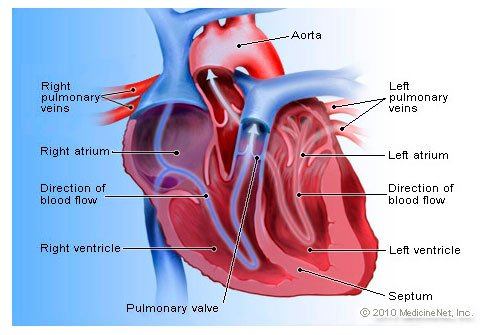

**Cardiovascular diseases** (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide.

Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. 
 
**Objective:** To create a classification filter (Using Logistics Regression & KNN Classification Algorithm) to predict Heart Failure. Also Comparing the performance of the filters


## The overview of Dataset

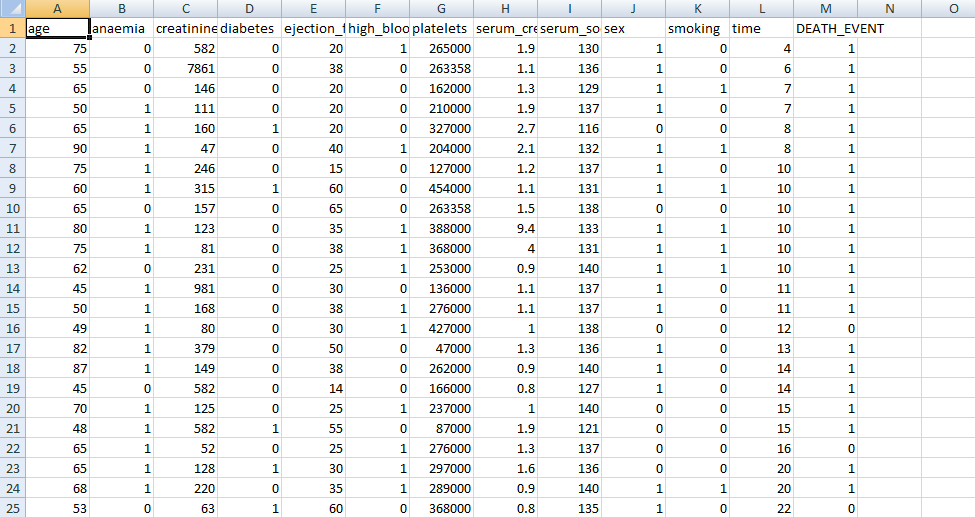

## Loading the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('heart_failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Geting data ready 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [8]:
heart=df.rename(columns = {'DEATH_EVENT':'Target'})

In [9]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Target
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
heart.shape

(299, 13)

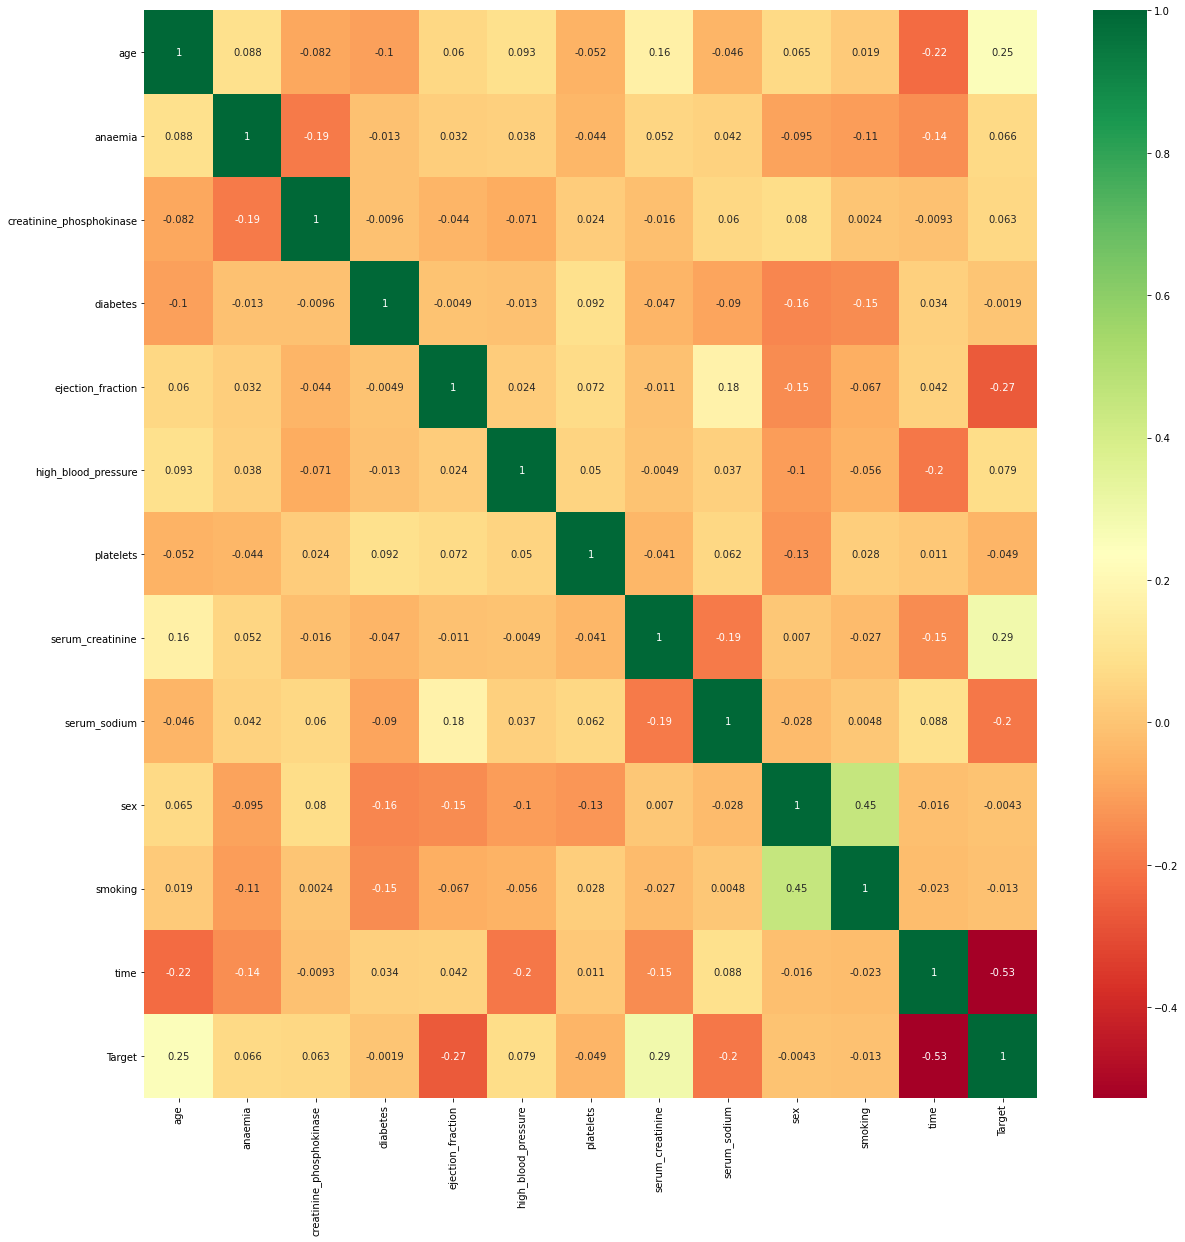

In [11]:
import seaborn as sns
corrmat=heart.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(heart[top_corr_features].corr(),annot=True,cmap='RdYlGn')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

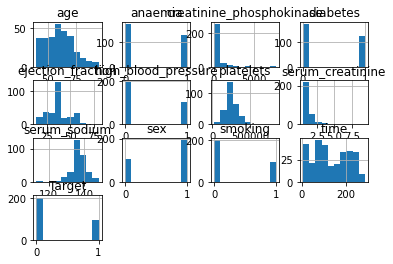

In [12]:
heart.hist()

**Checking out the data is balanced or not**

<AxesSubplot:xlabel='Target', ylabel='count'>

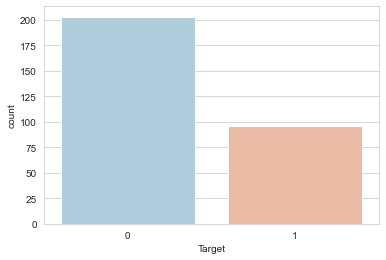

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=heart,palette='RdBu_r')

## Data Preprocessing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()


In [15]:
x=heart[['age','ejection_fraction','serum_creatinine','serum_sodium','time']]
y=heart['Target']

## (1) KNN Alogorithm

In [16]:
x1=x
y1=y

In [17]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3,random_state=16)
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape


((209, 5), (90, 5), (209,), (90,))

In [18]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,35):
    knn_classifier=KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x1_train,y1_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier score for different k values')

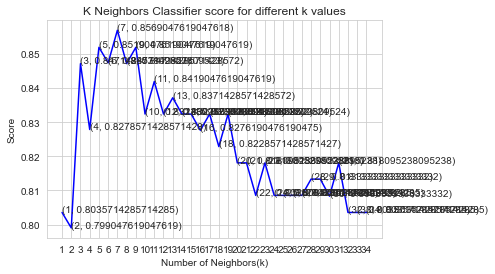

In [19]:
plt.plot([k for k in range(1,35)],knn_scores,color='blue')
for i in range (1,35):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,35)])
plt.xlabel('Number of Neighbors(k)')
plt.ylabel('Score')
plt.title('K Neighbors Classifier score for different k values')

In [20]:
knn_classifier=KNeighborsClassifier()
cvs=cross_val_score(knn_classifier,x1_train,y1_train,cv=10)

In [21]:
knn_classifier.fit(x,y)

KNeighborsClassifier()

In [22]:
knn_classifier.score(x1_train, y1_train)*100

88.51674641148325

In [23]:
KNN_accuracy=knn_classifier.score(x1_test,y1_test)*100

In [24]:
KNN_accuracy

84.44444444444444

## (2) Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn import metrics as sm

In [27]:
x2=x
y2=y

In [28]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3,random_state=43)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((209, 5), (90, 5), (209,), (90,))

In [29]:
logR=LogisticRegression(max_iter = 500).fit(x2_train,y2_train)
logR

LogisticRegression(max_iter=500)

In [30]:
logR.predict_proba(x2_test)

array([[0.96800692, 0.03199308],
       [0.30620862, 0.69379138],
       [0.75685739, 0.24314261],
       [0.97980448, 0.02019552],
       [0.19796348, 0.80203652],
       [0.83032735, 0.16967265],
       [0.98793324, 0.01206676],
       [0.71152816, 0.28847184],
       [0.90970966, 0.09029034],
       [0.29468815, 0.70531185],
       [0.75600512, 0.24399488],
       [0.0748705 , 0.9251295 ],
       [0.69015161, 0.30984839],
       [0.28339798, 0.71660202],
       [0.65523335, 0.34476665],
       [0.97493899, 0.02506101],
       [0.96913566, 0.03086434],
       [0.38167877, 0.61832123],
       [0.29779104, 0.70220896],
       [0.35333808, 0.64666192],
       [0.15433231, 0.84566769],
       [0.07783694, 0.92216306],
       [0.8810473 , 0.1189527 ],
       [0.85631754, 0.14368246],
       [0.09678959, 0.90321041],
       [0.46284501, 0.53715499],
       [0.09732507, 0.90267493],
       [0.20040619, 0.79959381],
       [0.97926343, 0.02073657],
       [0.21558425, 0.78441575],
       [0.

In [31]:
logR.predict_proba(x2_test).shape

(90, 2)

In [32]:
print(logR.intercept_)

[8.44713022]


In [33]:
print(logR.coef_)

[[ 0.03251449 -0.07166284  0.47762846 -0.05102628 -0.02183472]]


In [34]:
pred=logR.predict(x2_test)
pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [35]:
df1 = pd.DataFrame({'actual': y2_test, 'predictions': pred})
df1.head(10)

,actual,predictions
258,0,0
68,1,1
115,0,0
251,0,0
74,1,1
184,1,0
285,0,0
103,0,0
197,0,0
72,1,1


In [36]:
ct = pd.crosstab(df1['actual'], df1['predictions'])
ct

predictions,0,1
actual,,
0,51,3
1,11,25


In [37]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y2_test,pred)

array([[51,  3],
       [11, 25]], dtype=int64)

In [40]:
LogR_accuracy=(sm.accuracy_score(y2_test,pred))*100
LogR_accuracy

84.44444444444444

In [41]:
table=pd.DataFrame({'KNN accuracy':[KNN_accuracy], 'Logistic Regression':[LogR_accuracy]})

In [85]:
table

,KNN accuracy,Logistic Regression
0,84.444444,84.444444


# Submitted by : Ashwin Gorakhnath Dubey

# Submitted to: EICT-IIT (Roorkee)